In [3]:
# Apenas desenhando uma árvore

from treelib import Node,Tree

arvore = Tree()
arvore.create_node("Nó Raiz", "raiz")
arvore.create_node("Filho 1", "filho1", parent="raiz")
arvore.create_node("Filho 2", "filho2", parent="raiz")
arvore.create_node("Neto", "neto", parent="filho1")
arvore.show()

Nó Raiz
├── Filho 1
│   └── Neto
└── Filho 2



In [60]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset("iris")
data_sem_rotulos = data.iloc[:, :-1]
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
# conjunto X com apenas as linhas correspondentes às classes setosa e versicolor
data2 = data[ (data['species'] == 'setosa') | (data['species'] == 'versicolor') ]

rotulos = data2['species']

# remove última coluna
data2 = data2.iloc[:, :-1]

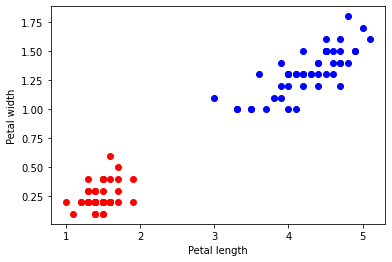

In [37]:
# vizualizando setosa e versicolor
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

setosa = data[ (data['species'] == 'setosa')]
versicolor = data[ (data['species'] == 'versicolor')]

plt.scatter(setosa['petal_length'],setosa['petal_width'],c='red')
plt.scatter(versicolor['petal_length'],versicolor['petal_width'],c='blue')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [ ]:
# árvore binária transversal, ou seja, cada nó está associado a
# apenas uma pergunta sobre apenas uma característica

# algoritmos de indução criam a árvore de decisão
# entropia como medida de impureza

In [41]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [44]:
# Cria um objeto decision tree com a medida de impuridade entropy
clf = tree.DecisionTreeClassifier(criterion="entropy")

#  Ajusta o classificador sobre o conjunto de dados rotulados
clf.fit(data2, rotulos)

DecisionTreeClassifier(criterion='entropy')

In [46]:
# Calcula o erro do classificador nos dados de treinamento
Ypredicted = clf.predict(data2)

In [51]:
# acurácia de 100%
accuracy_score(rotulos,Ypredicted)

1.0

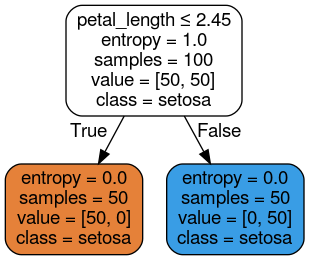

In [59]:
# vizualizando a árvore de decisão
# sudo apt-get install graphviz
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = data2.columns,  
                         class_names   = rotulos,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png()) 

In [65]:
# refazendo para a base inteira

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(data_sem_rotulos, data['species'])
Ypredicted = clf.predict(data_sem_rotulos)
accuracy_score(data['species'],Ypredicted)

1.0

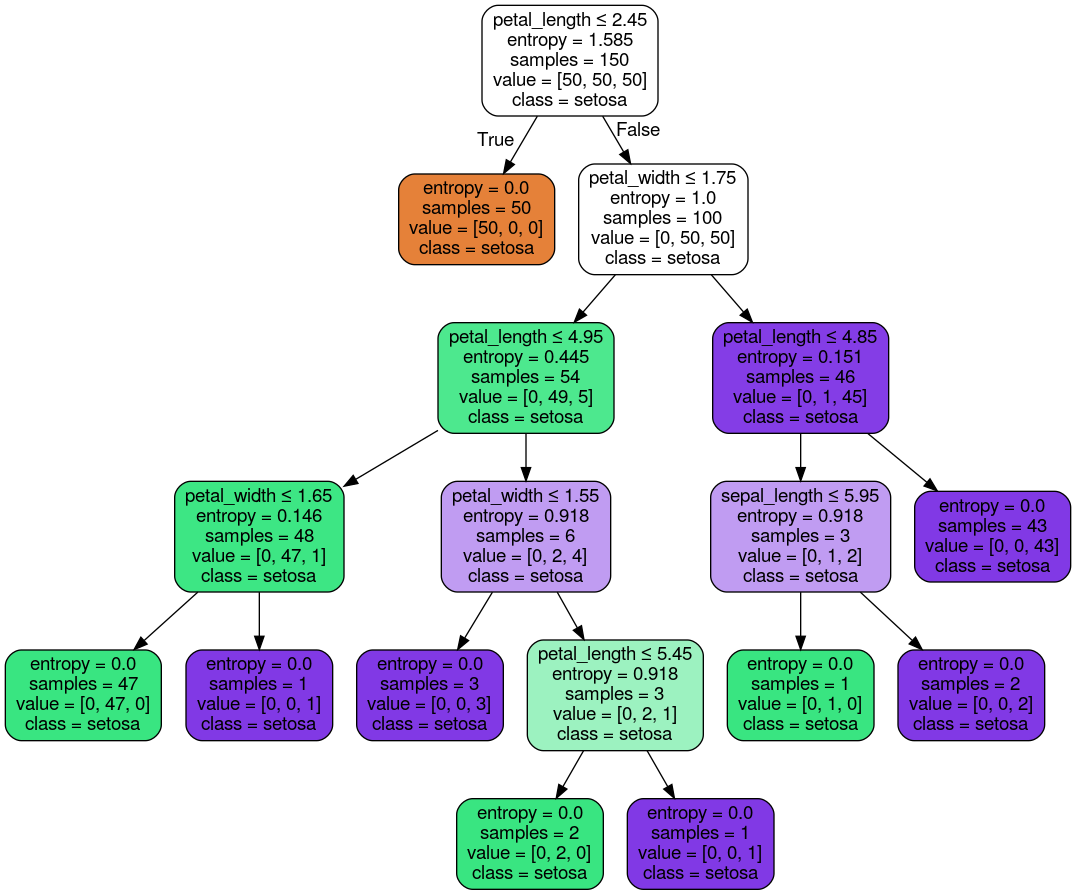

In [67]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = data_sem_rotulos.columns,  
                         class_names   = data['species'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png()) 

In [68]:
# limitando a profundidade da árvore
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf.fit(data_sem_rotulos, data['species'])
Ypredicted = clf.predict(data_sem_rotulos)
accuracy_score(data['species'],Ypredicted)

0.9733333333333334

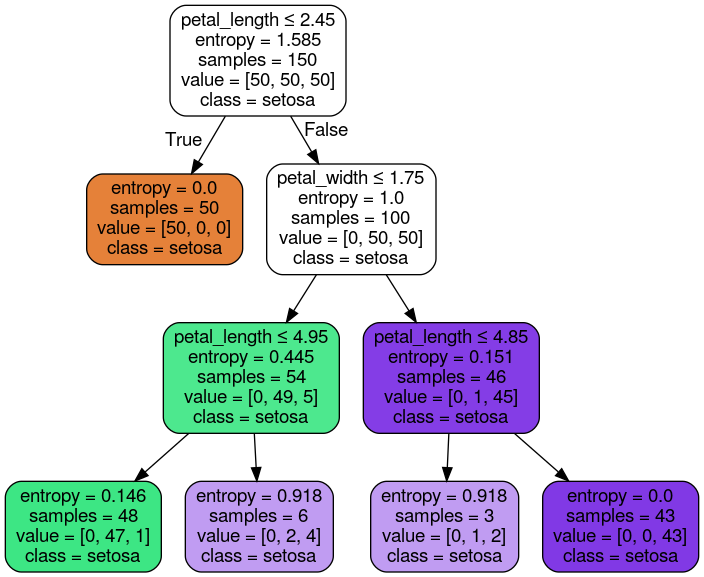

In [69]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = data_sem_rotulos.columns,  
                         class_names   = data['species'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png()) 

In [70]:
# limitando o número de folhas
clf = tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=3)
clf.fit(data_sem_rotulos, data['species'])
Ypredicted = clf.predict(data_sem_rotulos)
accuracy_score(data['species'],Ypredicted)

0.96

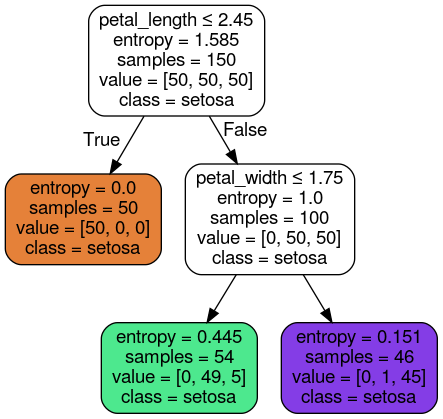

In [71]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = data_sem_rotulos.columns,  
                         class_names   = data['species'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png()) 